In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, chi2

# Membaca dan menyiapkan data

In [ ]:
# Baca dataset churn
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Buang record yang memiliki missing value
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Jumlah record tidak berubah, berarti tidak ada missing value pada dataset (sudah lengkap)

In [ ]:
# Summary dari kolom bertipe numerik
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Membagi dataset menjadi fitur (X) dan target (y)

In [ ]:
# Membagi dataset menjadi X (fitur) dan Y (label) untuk klasifikasi
# Data frame fitur (customerId dibuang karena tidak diperlukan)
X=df.iloc[:,1:-1]

# Data frame target Churn (label)
y=df["Churn"]
y=pd.DataFrame(y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
y.head()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
# Konversi fitur kategorikal menjadi numerik

from sklearn.preprocessing import LabelEncoder

y=LabelEncoder().fit_transform(y)

X['gender']=LabelEncoder().fit_transform(X['gender'])
X['Partner']=LabelEncoder().fit_transform(X['Partner'])
X['Dependents']=LabelEncoder().fit_transform(X['Dependents'])
X['PhoneService']=LabelEncoder().fit_transform(X['PhoneService'])
X['MultipleLines']=LabelEncoder().fit_transform(X['MultipleLines'])
X['InternetService']=LabelEncoder().fit_transform(X['InternetService'])
X['OnlineSecurity']=LabelEncoder().fit_transform(X['OnlineSecurity'])
X['OnlineBackup']=LabelEncoder().fit_transform(X['OnlineBackup'])
X['DeviceProtection']=LabelEncoder().fit_transform(X['DeviceProtection'])
X['StreamingTV']=LabelEncoder().fit_transform(X['StreamingTV'])
X['StreamingMovies']=LabelEncoder().fit_transform(X['StreamingMovies'])
X['Contract']=LabelEncoder().fit_transform(X['Contract'])
X['PaperlessBilling']=LabelEncoder().fit_transform(X['PaperlessBilling'])
X['PaymentMethod']=LabelEncoder().fit_transform(X['PaymentMethod'])
X['TechSupport']=LabelEncoder().fit_transform(X['TechSupport'])
X['TechSupport']=LabelEncoder().fit_transform(X['TechSupport'])

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [ ]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
# Handle value TotalCharges yang tidak bisa dikonversi menjadi numerik
# Ubah menjadi NA, lalu ganti dengan nilai mediannya
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'],errors='coerce')
median = X['TotalCharges'].median()
X['TotalCharges'].fillna(median,inplace=True)

In [ ]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


# Seleksi Fitur / Feature Selection dengan Lasso

In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Alpha terbaik menggunakan fungsi built-in LassoCV: %f" % reg.alpha_)
print("Score terbaik menggunakan fungsi built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso memilih " + str(sum(coef != 0)) + " fitur dan mengeliminasi " + str(sum(coef == 0)) + " fitur lainnya")

Alpha terbaik menggunakan fungsi built-in LassoCV: 0.199059
Score terbaik menggunakan fungsi built-in LassoCV: 0.223320
Lasso memilih 3 fitur dan mengeliminasi 16 fitur lainnya


In [ ]:
# Create a DataFrame to store the feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': reg.coef_})

# Sort the features by the index in ascending order
feature_importance = feature_importance.sort_index()

# Display the feature importance table
print(feature_importance)

             Feature  Importance
0             gender   -0.000000
1      SeniorCitizen    0.000000
2            Partner   -0.000000
3         Dependents   -0.000000
4             tenure   -0.001583
5       PhoneService   -0.000000
6      MultipleLines    0.000000
7    InternetService    0.000000
8     OnlineSecurity   -0.000000
9       OnlineBackup   -0.000000
10  DeviceProtection   -0.000000
11       TechSupport   -0.000000
12       StreamingTV   -0.000000
13   StreamingMovies    0.000000
14          Contract   -0.000000
15  PaperlessBilling    0.000000
16     PaymentMethod    0.000000
17    MonthlyCharges    0.007187
18      TotalCharges   -0.000087


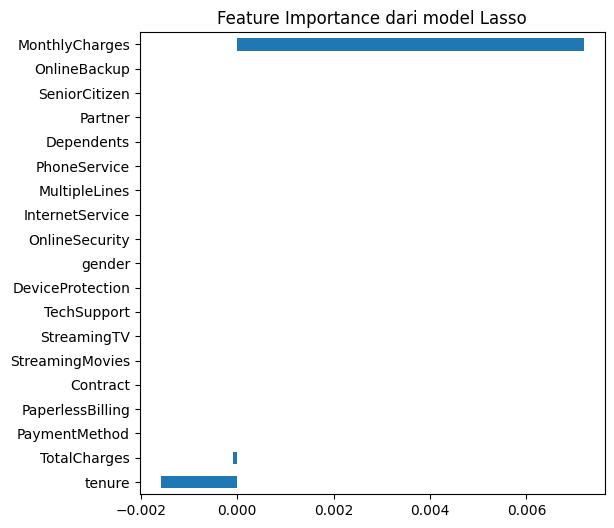

In [ ]:
# Plotting nilai importance tiap fitur
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
imp_coef.plot(kind = "barh")
plt.title("Feature Importance dari model Lasso")
plt.show()

Maka, jika kita menggunakan Lasso, terpilih 3 fitur yaitu Monthly Charges, TotalCharges, dan tenure



# Normaliasi Data Fitur

In [ ]:
# Normalisasi dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
names=X.columns
indexes=X.index
X=MinMaxScaler().fit_transform(X)
X=pd.DataFrame(X,columns=names,index=indexes)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330


# Seleksi Fitur / Feature Selection dengan SelectKBest (chi2)

In [ ]:
kmodel=SelectKBest(score_func=chi2,k=8)
x_clf_new=kmodel.fit_transform(X,y)
mask=kmodel.get_support()
important=X.columns[mask]
print(important,len(important))

Index(['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object') 8


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Perform feature selection
kmodel = SelectKBest(score_func=chi2, k=8)
x_clf_new = kmodel.fit_transform(X, y)

# Get the scores and corresponding feature names
scores = kmodel.scores_
feature_names = X.columns

# Create a DataFrame to display the scores
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores})

# Sort the DataFrame by score in descending order
scores_df = scores_df.sort_values(by='Score', ascending=False)

# Display the top features with their scores
print(scores_df.head(19))

             Feature       Score
14          Contract  557.890083
8     OnlineSecurity  275.805765
11       TechSupport  261.651933
4             tenure  226.096162
1      SeniorCitizen  134.351545
3         Dependents  133.036443
9       OnlineBackup  115.043260
15  PaperlessBilling  105.680863
10  DeviceProtection   95.651570
2            Partner   82.412083
18      TotalCharges   72.992350
17    MonthlyCharges   50.995371
16     PaymentMethod   19.497417
7    InternetService    4.910514
6      MultipleLines    4.873460
13   StreamingMovies    4.117700
12       StreamingTV    3.745102
0             gender    0.258699
5       PhoneService    0.097261


Maka, jika kita menggunakan SelectKBest, terpilih 8 fitur yaitu SeniorCitizen, Dependents, tenure, OnlineSecurity, OnlineBackup, TechSupport, Contract, dan PaperlessBilling

# Membagi Data menjadi 3 set: train, test dan validation

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_rem,y_train,y_rem = train_test_split(X, y, test_size=0.20, random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_rem, y_rem, test_size=0.50, random_state=42)

# Implementasi Logistic Regression

1. Tanpa Feature Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(X_train,y_train)

# Akurasi Validation
acc = accuracy_score(log.predict(X_val),y_val)
f'Validation accuracy: {round(acc*100,2)}%'

# Get the coefficients and intercept
coefficients = log.coef_
intercept = log.intercept_

# Display the regression function
print("Regression function:")
print("Intercept:", intercept)
for i, feature in enumerate(X.columns):
    print(f"Coefficient for {feature}: {coefficients[0][i]}")

Regression function:
Intercept: [-0.25082335]
Coefficient for gender: -0.05353614322050116
Coefficient for SeniorCitizen: 0.1848241387056489
Coefficient for Partner: 0.05950153052809574
Coefficient for Dependents: -0.1880955620394571
Coefficient for tenure: -3.08330268246702
Coefficient for PhoneService: -0.9536136782369321
Coefficient for MultipleLines: 0.15458323693266884
Coefficient for InternetService: 0.45025687093741773
Coefficient for OnlineSecurity: -0.5841800227508095
Coefficient for OnlineBackup: -0.3023510049020858
Coefficient for DeviceProtection: -0.15615847331372082
Coefficient for TechSupport: -0.5076453578443438
Coefficient for StreamingTV: -0.010392861112327127
Coefficient for StreamingMovies: 0.08843524249838351
Coefficient for Contract: -1.4521506422703168
Coefficient for PaperlessBilling: 0.36041528243499554
Coefficient for PaymentMethod: 0.18988408385829372
Coefficient for MonthlyCharges: 2.3117954997474692
Coefficient for TotalCharges: 1.2612188720884403


In [ ]:
# Akurasi Testing
acc = accuracy_score(log.predict(X_test),y_test)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 82.41%'

2. Dengan fitur hasil seleksi Lasso

In [ ]:
log.fit(X_train[["MonthlyCharges","TotalCharges","tenure"]],y_train)

# Akurasi Validation
acc = accuracy_score(log.predict(X_val[["MonthlyCharges","TotalCharges","tenure"]]),y_val)
f'Validation accuracy: {round(acc*100,2)}%'

'Validation accuracy: 79.12%'

In [ ]:
# Akurasi Testing
acc = accuracy_score(log.predict(X_test[["MonthlyCharges","TotalCharges","tenure"]]),y_test)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 80.57%'

3. Dengan fitur hasil seleksi KBest

In [ ]:
log.fit(X_train[['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity','OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling']],y_train)

# Akurasi Validation
acc = accuracy_score(log.predict(X_val[['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity','OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling']]),y_val)
f'Validation accuracy: {round(acc*100,2)}%'

'Validation accuracy: 78.55%'

In [ ]:
# Akurasi Testing
acc = accuracy_score(log.predict(X_test[['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity','OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling']]),y_test)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 80.14%'

# Implementasi Decision Tree



In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier, plot_tree
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt = dt.fit(X_train,y_train)

# Akurasi Training
y_pred = dt.predict(X_train)
acc = accuracy_score(y_train,y_pred)
f'Training accuracy: {round(acc*100,2)}%'

'Training accuracy: 78.27%'

In [ ]:
# Akurasi Validation
y_pred = dt.predict(X_val)
acc = accuracy_score(y_val,y_pred)
f'Validation accuracy: {round(acc*100,2)}%'

'Validation accuracy: 77.41%'

In [ ]:
# Akurasi Testing
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 78.87%'

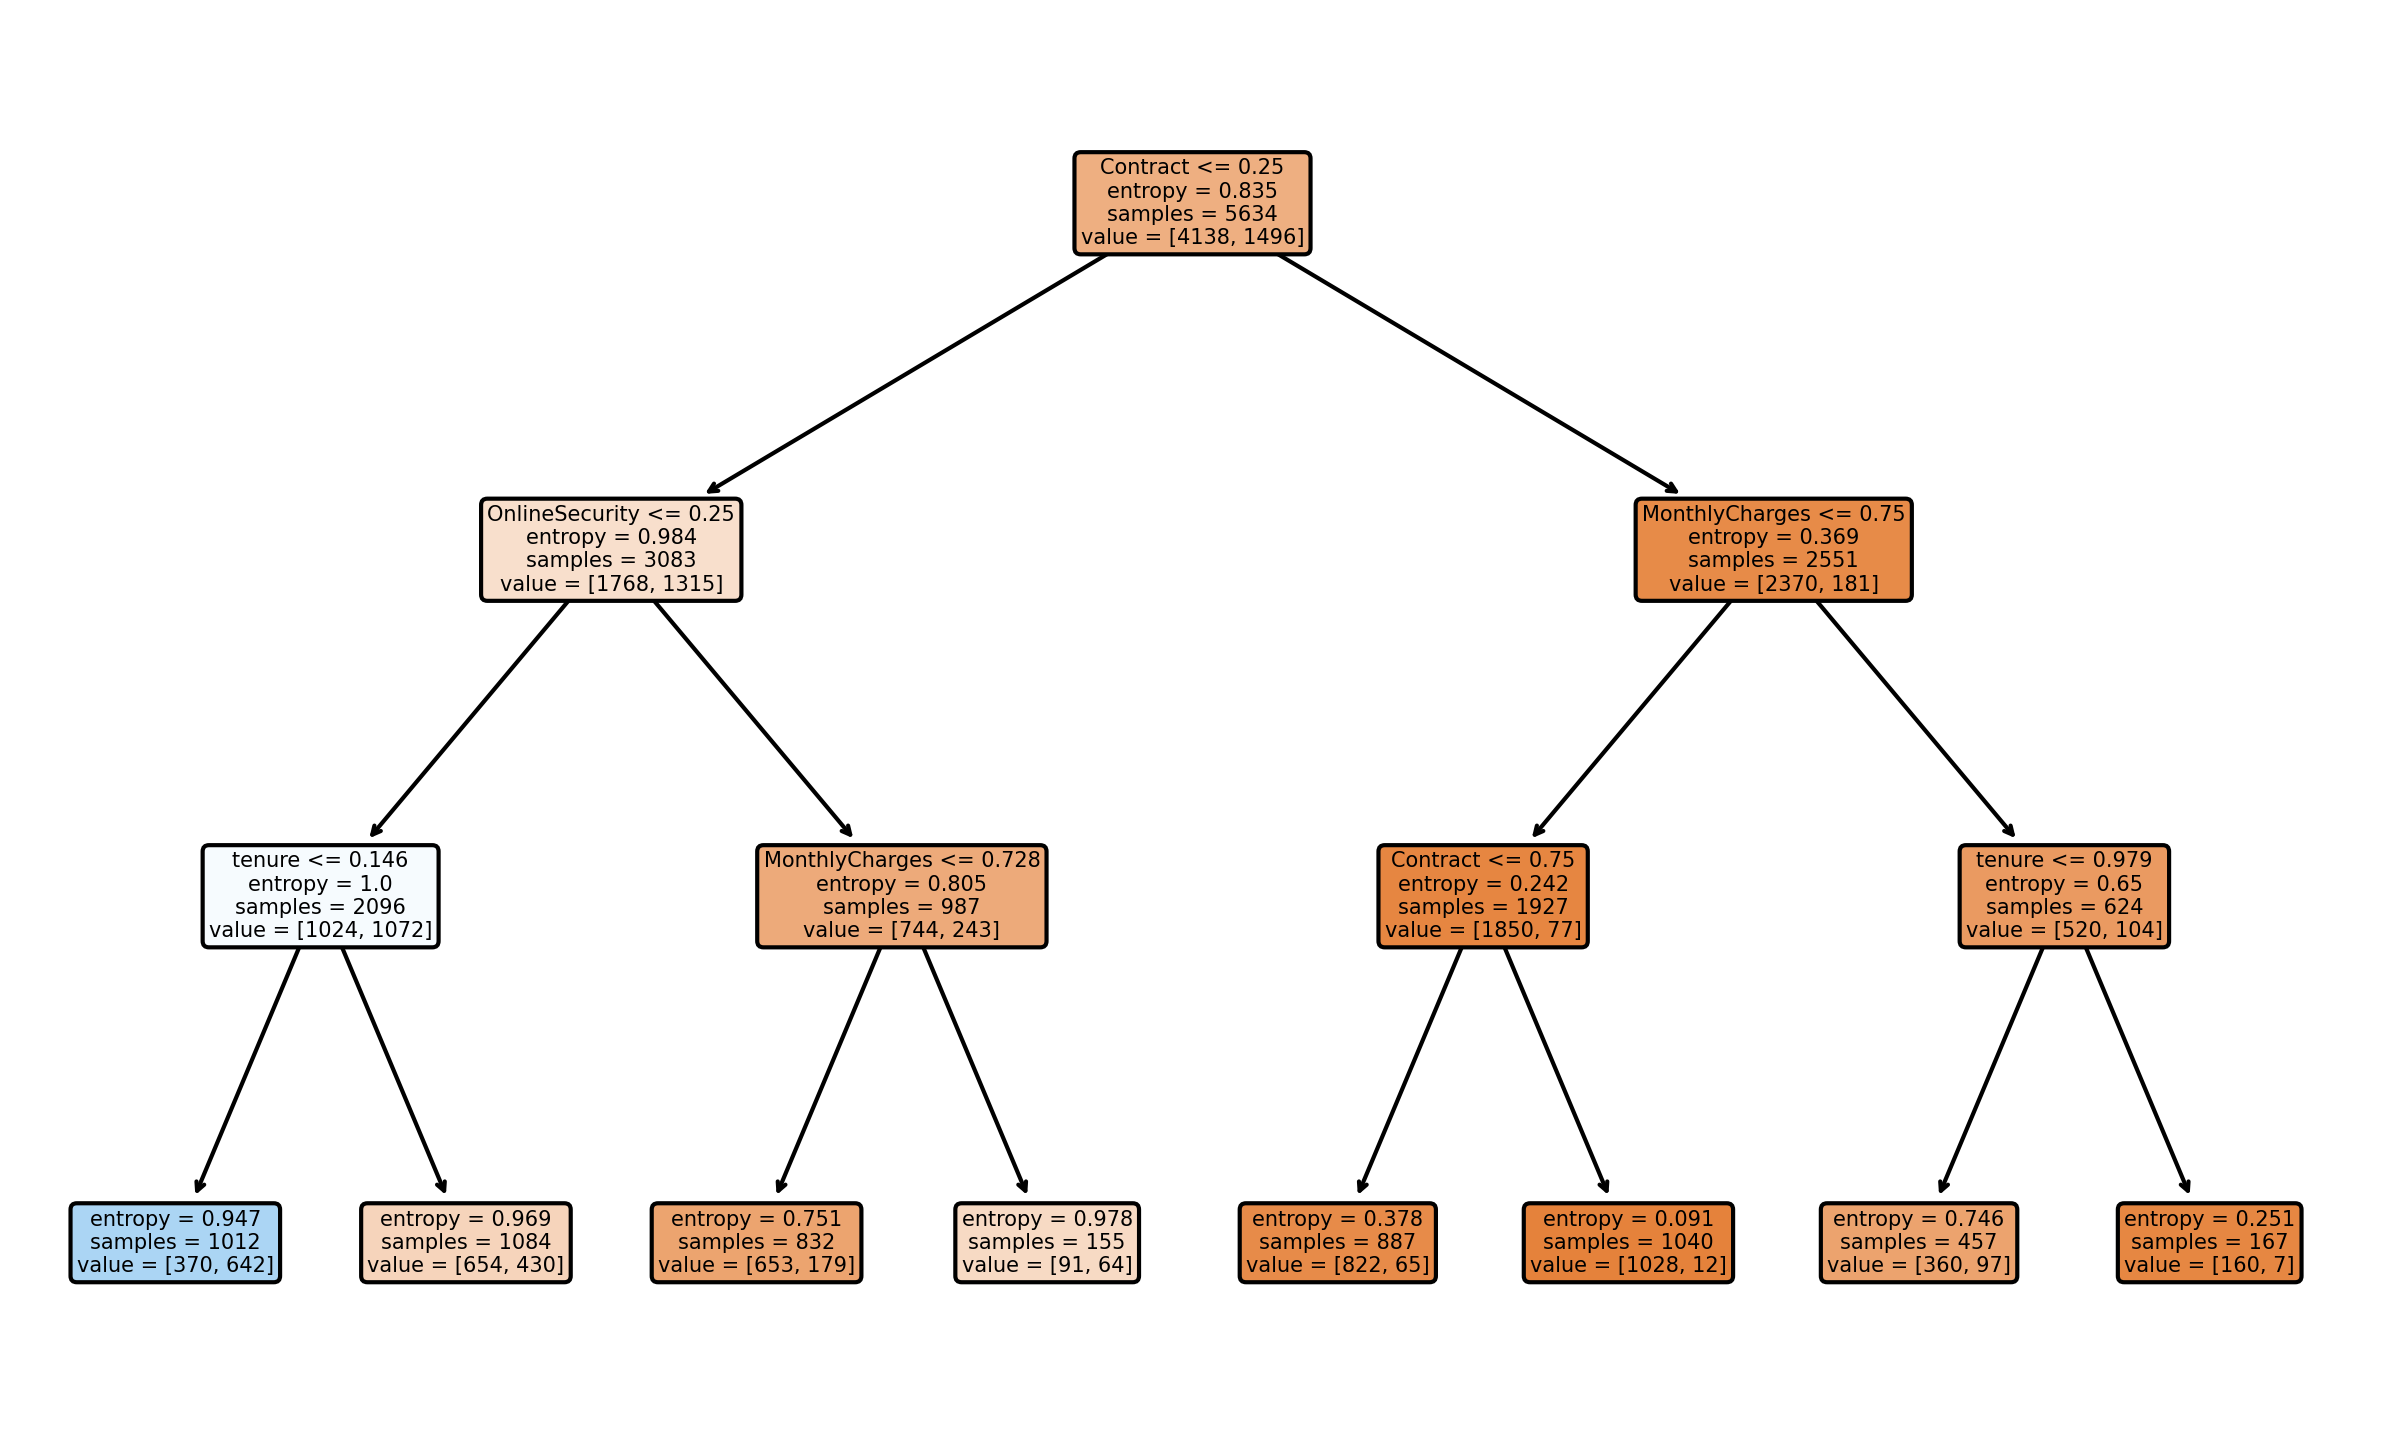

In [ ]:
plt.figure(figsize=(10, 6), dpi=300)  # Adjust the figsize and dpi values as per your preference
plot_tree(dt, filled=True, rounded=True, feature_names=X.columns)
plt.show()

# Implementasi Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train,y_train)

# Akurasi Training
y_pred = dt.predict(X_train)
acc = accuracy_score(y_train,y_pred)
f'Training accuracy: {round(acc*100,2)}%'

'Training accuracy: 78.27%'

In [ ]:
# Akurasi Validation
y_pred = dt.predict(X_train)
acc = accuracy_score(y_train,y_pred)
f'Training accuracy: {round(acc*100,2)}%'

'Training accuracy: 78.27%'

In [ ]:
# Akurasi Testing
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
f'Testing accuracy: {round(acc*100,2)}%'

'Testing accuracy: 79.72%'

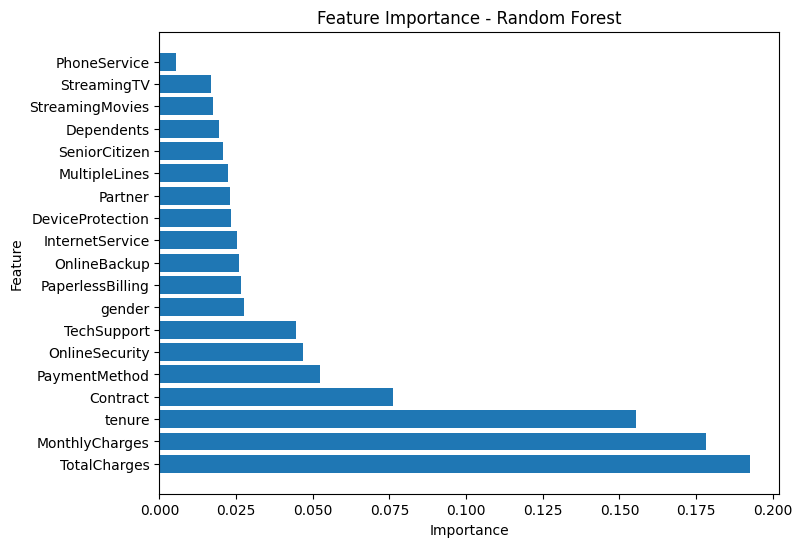

In [ ]:
# Get feature importances from the random forest model
importances = rf.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store the feature importances
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()

# Kesimpulan

Algoritme Logistic Regression tanpa seleksi fitur menghasilkan model yang paling akurat dengan nilai akurasi testing 82.41% dibandingkan algoritme Decision Tree (78.87%) dan Random Forest (79.72%).

Penggunaan feature selection baik dengan Lasso maupun KBest menurunkan nilai akurasi menjadi 80.57% (Lasso) dan 80.14% (KBest). Namun, dengan memilih fitur-fitur yang penting saja, performa model saat training maupun saat inferensi dapat ditingkatkan.